In [1]:
#Loading the Data
import pandas as pd
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')


In [2]:
# Univariate Analysis
#Here we will explore all variables one by one. 
#Method to perform univariate analysis will depend on whether the variable type is categorical or continuous.
#So lets consider those individually.
# Lets start by looking at each data type
train.dtypes



ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [3]:
# Continuos variables ( generally focuos on  central tendency  and spread of data such as mean,median, IQR and Standard deviation...)
train.describe()

,ID,Age,Hours.Per.Week
count,11455.000000,11455.000000,11455.000000
mean,5728.000000,38.422872,40.534352
std,3306.918001,13.606918,12.311354
min,1.000000,17.000000,1.000000
25%,2864.500000,28.000000,40.000000
50%,5728.000000,37.000000,40.000000
75%,8591.500000,47.000000,45.000000
max,11455.000000,90.000000,99.000000


In [4]:
#Categorical Variables:
#In case of categorical variables, we generally use frequency table to understand distribution of each category. 
#It can be measured using two metrics, Count and Count% against each category
categorical_variables=train.dtypes.loc[train.dtypes=='object'].index
categorical_variables


Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [5]:
# calculating number of unique categories in categorical variables
train[categorical_variables].apply(lambda x:len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64

In [6]:
# Analyzing the categorical variables
train['Race'].value_counts()

White                 9819
Black                 1083
Asian-Pac-Islander     356
Amer-Indian-Eskimo     109
Other                   88
Name: Race, dtype: int64

In [7]:
# for Percentages
train['Race'].value_counts()/train.shape[0]

White                 0.857180
Black                 0.094544
Asian-Pac-Islander    0.031078
Amer-Indian-Eskimo    0.009515
Other                 0.007682
Name: Race, dtype: float64

In [8]:
train['Workclass'].value_counts()
train['Workclass'].value_counts()/train.shape[0]


Private             0.695155
Self-emp-not-inc    0.079354
Local-gov           0.063029
State-gov           0.040594
Self-emp-inc        0.034657
Federal-gov         0.028197
Never-worked        0.000175
Without-pay         0.000175
Name: Workclass, dtype: float64

In [9]:
# Multi variate analysis
#Both Categorical:
#print cross tabulation
ct=pd.crosstab(train['Sex'],train['Income.Group'],margins=True)
ct

Income.Group,<=50K,>50K,All
Sex,,,
Female,3326,418,3744
Male,5400,2311,7711
All,8726,2729,11455


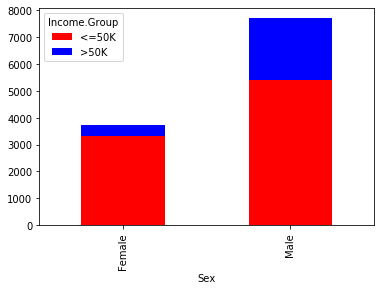

In [10]:
import matplotlib
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'],grid=False)


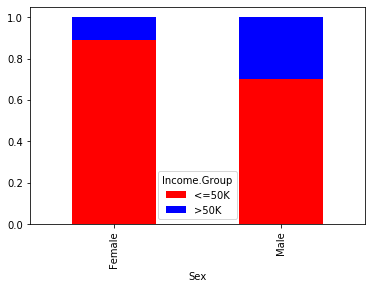

In [11]:
def percConvert(ser):
    return ser/float(ser[-1])

ct2=ct.apply(percConvert, axis=1)
ct2.iloc[:-1,:-1].plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

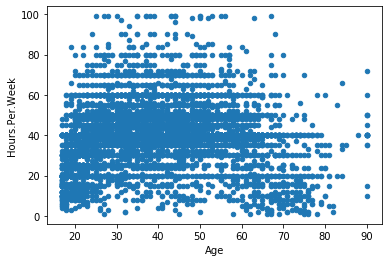

In [12]:
#Continuous Vs Continuous
train.plot('Age' , 'Hours.Per.Week', kind='scatter')

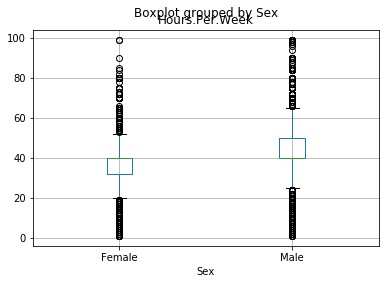

In [13]:
#Categorical-Continuous combination
train.boxplot(column='Hours.Per.Week', by= 'Sex')

In [14]:
# Missing Values
# Checking for missing values in the train data
train.apply(lambda x: sum(x.isnull()))

ID                  0
Age                 0
Workclass         672
Education           0
Marital.Status      0
Occupation        674
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    205
Income.Group        0
dtype: int64

In [15]:
test.apply(lambda x: sum(x.isnull()))

ID                  0
Age                 0
Workclass         963
Education           0
Marital.Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    274
dtype: int64

In [16]:
# Imputation
from scipy.stats import mode
mode(train['Workclass']).mode[0]


C:\Users\Sm\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'Private'

In [17]:
var_to_impute = ['Workclass', 'Occupation', 'Native.Country']
for var in var_to_impute:
    train[var].fillna(mode(train[var]).mode[0],inplace=True)
    test[var].fillna(mode(train[var]).mode[0],inplace=True)
    

In [18]:
train.apply(lambda x: sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

In [19]:
test.apply(lambda x: sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
dtype: int64

In [20]:
# Variable Transformations
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [21]:
# Calucationg percentage of the data 
train['Workclass'].value_counts()/train.shape[0]

Private             0.753819
Self-emp-not-inc    0.079354
Local-gov           0.063029
State-gov           0.040594
Self-emp-inc        0.034657
Federal-gov         0.028197
Never-worked        0.000175
Without-pay         0.000175
Name: Workclass, dtype: float64

In [22]:
categories_to_combine=['State-gov','Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked']

In [24]:
#Run  a  loop and replace  all variables with others
for cat in categories_to_combine:
    train['Workclass'].replace({cat:'Others'},inplace=True)
    test['Workclass'].replace({cat:'Others'},inplace=True)
    

In [25]:
train['Workclass'].value_counts()/train.shape[0]

Private             0.753819
Others              0.103797
Self-emp-not-inc    0.079354
Local-gov           0.063029
Name: Workclass, dtype: float64

In [27]:
categorial_variables = categorical_variables[1:]
categorial_variables


Index(['Education', 'Marital.Status', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [28]:
#Run a loop over these values and combine categories
for column in categorical_variables:
    frq=train[column].value_counts()/train.shape[0]
    categories_to_combine = frq.loc[frq.values<0.05].index
    #Loop over all the  categories  and combined as others
    for cat in  categories_to_combine:
        train[column].replace({cat:'Others'},inplace=True)
        test[column].replace({cat:'Others'},inplace=True)
        

In [29]:
#Check the results for train and Test data
train[categorical_variables].apply(lambda x:len(x.unique()))

Workclass         4
Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
Income.Group      2
dtype: int64

In [32]:
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,Others,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Others,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,Others,Married-civ-spouse,Others,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Others,Black,Female,40,Others,<=50K


In [36]:
train['Workclass'].value_counts()

Private             8635
Others              1189
Self-emp-not-inc     909
Local-gov            722
Name: Workclass, dtype: int64

In [37]:
#Predictive Modeling
#Data Pre Processsing
#Sklearn provides a function LabelEncoder for converting categories to numbers in range 0,1..(N-1) where N is the number of categories.
from  sklearn.preprocessing import LabelEncoder


In [58]:
categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
categorical_variables = test.dtypes.loc[test.dtypes=='object'].index

categorical_variables

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country'],
      dtype='object')

In [59]:
# We convert using Lable encoder
le =  LabelEncoder()
for var in categorical_variables:
    train[var] =  le.fit_transform(train[var])
    test[var] =  le.fit_transform(test[var])
    
    

In [62]:
train.dtypes

ID                int64
Age               int64
Workclass         int64
Education         int64
Marital.Status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Hours.Per.Week    int64
Native.Country    int64
Income.Group      int32
dtype: object

In [63]:
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,1,0,2,0,1,2,1,40,1,0
1,2,50,3,0,1,2,0,2,1,13,1,0
2,3,38,2,1,0,5,1,2,1,40,1,0
3,4,53,2,3,1,5,0,0,1,40,1,0
4,5,28,2,0,1,6,2,0,0,40,0,0


In [64]:
test.head()


,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country
0,32562,25,2,3,2,3,3,0,1,40,1
1,32563,38,2,1,1,5,0,2,1,50,1
2,32564,28,0,3,1,5,0,2,1,40,1
3,32565,44,2,4,1,3,0,0,1,40,1
4,32566,18,2,4,2,6,3,2,0,30,1


In [83]:
# Fittign A mOdel
from sklearn.tree import DecisionTreeClassifier
dependent_variable = 'Income_Group'
dependent_variable

independet_variable = [X for X in train.columns  if X not in ['ID','Income.Group']]
independet_variable



['Age',
 'Workclass',
 'Education',
 'Marital.Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Hours.Per.Week',
 'Native.Country']

In [85]:
#initilaze  algorithmode
model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,max_features='sqrt')
# Fit Model
model.fit(train[independet_variable],train['Income.Group'])


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
#Make predictions
Predictions_train= model.predict(train[independet_variable])
Predictions_test= model.predict(test[independet_variable])


In [91]:
#accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
acc_train=accuracy_score(train['Income.Group'],Predictions_train)
acc_train
cm=confusion_matrix(train['Income.Group'],Predictions_train)
cm


array([[7980,  746],
       [1551, 1178]], dtype=int64)